#Assignment 1

In [33]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import scipy.stats
import os

Populating the interactive namespace from numpy and matplotlib


In [34]:
df=pd.read_csv('201410-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [28]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,1027,10/1/2014 00:00:27,10/1/2014 00:17:34,479,9 Ave & W 45 St,40.760193,-73.991255,540,Lexington Ave & E 26 St,40.741473,-73.983209,21376,Subscriber,1977,1,38,NaN
1,534,10/1/2014 00:00:36,10/1/2014 00:09:30,417,Barclay St & Church St,40.712912,-74.010202,417,Barclay St & Church St,40.712912,-74.010202,16086,Subscriber,1974,2,NaN,41
2,416,10/1/2014 00:00:42,10/1/2014 00:07:38,327,Vesey Pl & River Terrace,40.715338,-74.016584,415,Pearl St & Hanover Square,40.704718,-74.009260,16073,Subscriber,1990,1,25,NaN


In [43]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,date,hour,ageDay,ageNight,ageM,ageF
0,1027,10/1/2014 00:00:27,10/1/2014 00:17:34,479,9 Ave & W 45 St,40.760193,-73.991255,540,Lexington Ave & E 26 St,40.741473,...,21376,Subscriber,1977,1,2014-10-01 00:00:27,0,NaN,NaN,38,NaN
1,534,10/1/2014 00:00:36,10/1/2014 00:09:30,417,Barclay St & Church St,40.712912,-74.010202,417,Barclay St & Church St,40.712912,...,16086,Subscriber,1974,2,2014-10-01 00:00:36,0,NaN,NaN,NaN,41
2,416,10/1/2014 00:00:42,10/1/2014 00:07:38,327,Vesey Pl & River Terrace,40.715338,-74.016584,415,Pearl St & Hanover Square,40.704718,...,16073,Subscriber,1990,1,2014-10-01 00:00:42,0,NaN,NaN,25,NaN


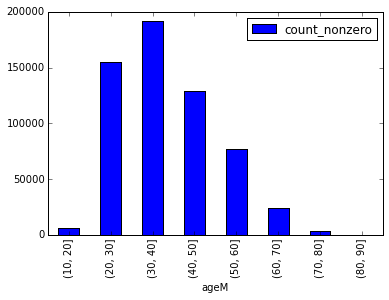

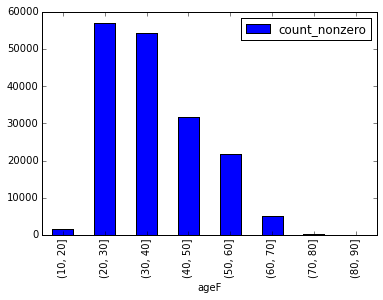

In [16]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001968
(20, 30]       0.065516
(30, 40]       0.053657
(40, 50]       0.018060
(50, 60]       0.013701
(60, 70]       0.003284
(70, 80]       0.000065
(80, 90]       0.000000


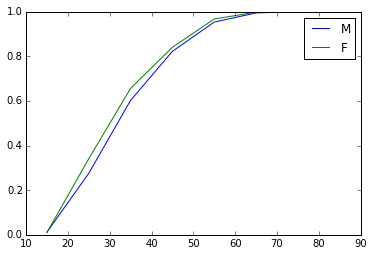

In [17]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [27]:
#KS test

ks = scipy.stats.ks_2samp(df.ageF[~np.isnan(df.ageF)], df.ageM[~np.isnan(df.ageM)])
print ks

(0.073506823250809539, 0.0)


##KS Test interpretation

The graph shows us that the age distributions by gender look very similar. The KS two sample test returns a very small p value, almost zero, which is less than our chosen alpha of 0.05, so we reject the null hypothesis. The distributions are not similar, despite what they look like.



In [48]:
pearson = scipy.stats.pearsonr(df.ageF,df.ageM)
print pearson

(nan, 1.0)


In [49]:
spearman = scipy.stats.spearmanr(df.ageF,df.ageM, axis=0)
print spearman

(-0.43587403520303125, 0.0)


#Correlation of Gender and Age: This Doesn't Make Sense

I'm not sure why I'm getting 'nan' for the Pearson test. After Googling this, I suspect it is because we are dividing by zero somewhere. The Pearson correlation coefficient measures the linear relationship between two datasets. It's a measure of linear relationship between variables. There are two problems with running this test after splitting our data by gender. First of all, gender is a categorical variable. Either you are male or female. If you are male, you must be not female, and vice versa. So I'm not sure if we can run a Pearson test to see the correlation between the gender and age variables. Does the 1.0  mean these variables are completely correlated?

The Spearman test assesses how well the relationship between two variables can be described using a monotonic function. If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other (Wikipedia). As discussed earlier, male and female are mutually exclusive variables! So why is this test giving me a coefficient of -0.4? I'm not understanding any of this, and this is frankly counterproductive to me understanding statistics.

In [38]:
#Split by Day and Night riders
df['hour'] = pd.DatetimeIndex(df['starttime']).hour

In [39]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,1027,10/1/2014 00:00:27,10/1/2014 00:17:34,479,9 Ave & W 45 St,40.760193,-73.991255,540,Lexington Ave & E 26 St,40.741473,-73.983209,21376,Subscriber,1977,1,2014-10-01 00:00:27,0
1,534,10/1/2014 00:00:36,10/1/2014 00:09:30,417,Barclay St & Church St,40.712912,-74.010202,417,Barclay St & Church St,40.712912,-74.010202,16086,Subscriber,1974,2,2014-10-01 00:00:36,0
2,416,10/1/2014 00:00:42,10/1/2014 00:07:38,327,Vesey Pl & River Terrace,40.715338,-74.016584,415,Pearl St & Hanover Square,40.704718,-74.009260,16073,Subscriber,1990,1,2014-10-01 00:00:42,0


In [64]:
df['ageDay'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['hour']>6) & (df['hour'] <= 18)]
df['ageNight'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['hour'] <= 6) | (df['hour'] > 18)]

In [66]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,date,hour,ageDay,ageNight,ageM,ageF
0,1027,10/1/2014 00:00:27,10/1/2014 00:17:34,479,9 Ave & W 45 St,40.760193,-73.991255,540,Lexington Ave & E 26 St,40.741473,...,21376,Subscriber,1977,1,2014-10-01 00:00:27,0,NaN,38,38,NaN
1,534,10/1/2014 00:00:36,10/1/2014 00:09:30,417,Barclay St & Church St,40.712912,-74.010202,417,Barclay St & Church St,40.712912,...,16086,Subscriber,1974,2,2014-10-01 00:00:36,0,NaN,41,NaN,41
2,416,10/1/2014 00:00:42,10/1/2014 00:07:38,327,Vesey Pl & River Terrace,40.715338,-74.016584,415,Pearl St & Hanover Square,40.704718,...,16073,Subscriber,1990,1,2014-10-01 00:00:42,0,NaN,25,25,NaN


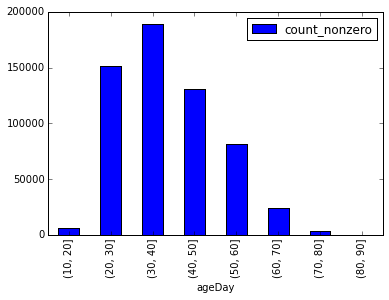

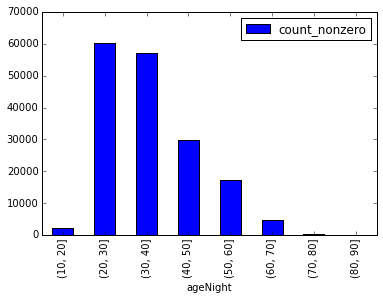

In [67]:
bins = np.arange(10, 99, 10)
df.ageDay.groupby(pd.cut(df.ageDay, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageNight.groupby(pd.cut(df.ageNight, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageDay                 
(10, 20]       0.000925
(20, 30]       0.093721
(30, 40]       0.105507
(40, 50]       0.055715
(50, 60]       0.018546
(60, 70]       0.003160
(70, 80]       0.000238
(80, 90]       0.000000


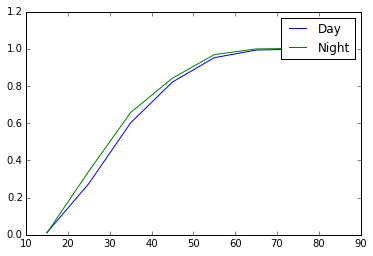

In [68]:
#print df.ageS, df.ageS.cumsum()

csDay=df.ageDay.groupby(pd.cut(df.ageDay, bins)).agg([count_nonzero]).cumsum()

csNight=df.ageNight.groupby(pd.cut(df.ageNight, bins)).agg([count_nonzero]).cumsum()

print np.abs(csDay / csDay.max()-csNight / csNight.max())

pl.plot(bins[:-1] + 5, csM / csDay.max(), label = "Day")
pl.plot(bins[:-1] + 5, csF / csNight.max(), label = "Night")
pl.legend()

In [69]:
ks2 = scipy.stats.ks_2samp(df.ageDay[~np.isnan(df.ageDay)], df.ageNight[~np.isnan(df.ageNight)])
print ks2

(0.11852083190709528, 0.0)


The KS two sample test returns a very small p value, almost zero, which is less than our chosen alpha of 0.05, so we reject the null hypothesis. The distributions are not similar.

In [70]:
pearson2 = scipy.stats.pearsonr(df.ageDay,df.ageNight)
print pearson2

(nan, 1.0)


In [72]:
spearman2 = scipy.stats.spearmanr(df.ageDay,df.ageNight, axis=0)
print spearman2

(-0.42402510275412336, 0.0)


Again, I have no idea what this Pearson and Spearman test is telling us. See comments above.